In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn import utils
%matplotlib inline

## Load Data ##


In [ ]:
RegData  = np.genfromtxt("RegData.csv",delimiter = ",")
x_RegPoints = RegData[:,0]
y_RegPoints = RegData[:,1]

To have a dataset or set of data points, the student must generate a pair of arrays X and y with the values in X equally distributed between 0 and 20 and the values in y such that: yi = a*xi + b (and a = -2, b = 1)

In [ ]:
x_points = np.linspace(0,20)
y_points = -2*x_points +1

## Batch Gradient descent single value ##

In [ ]:
def gradient_descent(x,y,Epoch = 1000,learning_rate = 0.001):
    m = len(y)
    costs, thetas0, thetas1 = [],[],[]
    # assume theta0 and theta1 = 0
    theta0  = theta1 = 0
    for i in range(Epoch):
        #2.calculate the hypothsis
        y_hat = theta0 +theta1*x
        #3.calculate error
        e = y_hat - y
        #4.calculate cost function
        cost = np.sum(e**2)/(2*m)
        costs.append(cost)
        #5.calculate gradients
        gradient0 = np.sum(e)/m
        gradient1 = np.dot(e.T,x)/m
        #6.update thetas
        theta0 = theta0 - learning_rate*gradient0
        theta1 = theta1 - learning_rate*gradient1
        thetas0.append(theta0)
        thetas1.append(theta1)
        if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
          print("stopped at iteration {}".format(i))
          break
    return costs , thetas0, thetas1

In [ ]:
costs,thetas0,thetas1 = gradient_descent(x_RegPoints,y_RegPoints)

stopped at iteration 91


## Scatter plot of Epoch vs Cost ##

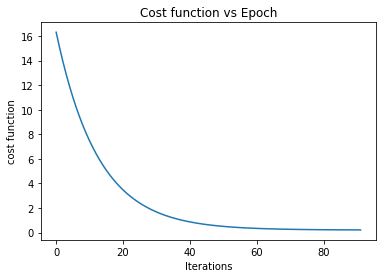

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");


## Scatter plot of theta0 vs Cost ##

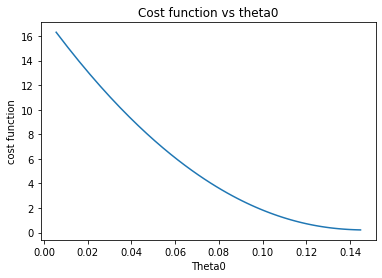

In [ ]:
plt.plot(thetas0,costs);
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");


## Scatter plot of theta1 vs Cost ##

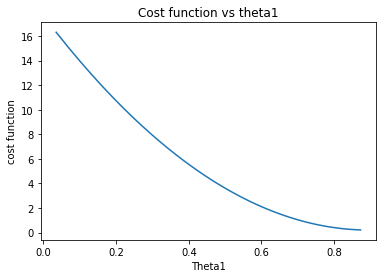

In [ ]:
plt.plot(thetas1,costs)
plt.xlabel("Theta1");
plt.ylabel("cost function");
plt.title("Cost function vs theta1");

## Regression Model ##

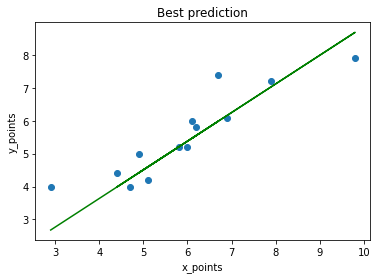

In [ ]:
plt.scatter( x_RegPoints,y_RegPoints)
plt.plot(x_RegPoints, thetas0[-1]+ thetas1[-1]*x_RegPoints,"g")
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Best prediction");

## Model accuracy ##

In [ ]:
r2_score(y_RegPoints,thetas0[-1]+thetas1[-1]*x_RegPoints)

0.7344190023473358

## Gradient descent on dataset 2 ##

In [ ]:
_costs,_thetas0,_thetas1 = gradient_descent(x_points,y_points)

stopped at iteration 40


## Scatter plot of Epoch vs Cost ##

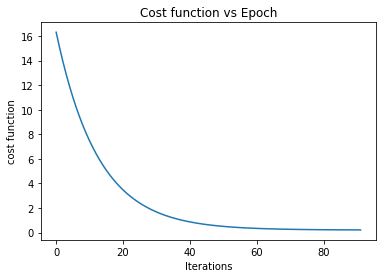

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");


## Model accuracy ##

In [ ]:
r2_score(y_points,_thetas0[-1]+_thetas1[-1]*x_points)

0.997604204624436

## Multilevel linear Regression ##


## Load Data ##

In [ ]:
MultipleLR = np.genfromtxt("MultipleLR.csv",delimiter = ",")
x1_points = MultipleLR[:,0]
x2_points = MultipleLR[:,1]
x3_points = MultipleLR[:,2]
y_points = MultipleLR[:,-1]
print(MultipleLR)


[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]


In [ ]:
def multiLR_gradient(x1,x2,x3,y,learning_rate = 0.0001,Epoch = 150):
  theta = np.array([0,0,0,0])
  thetas = []
  hypothesis ,costs= [],[]
  X = np.hstack((np.ones((len(x1),1)),x1.reshape(len(x1),1),x2.reshape(len(x1),1),x3.reshape(len(x3),1)))
  for i in range(Epoch):
    #calculate hypothesis
    y_hat = np.dot(X,theta)
    hypothesis.append(y_hat)
    #calculate error
    e = y_hat - y
    #calculate mean square error
    cost = (1/(len(y)*2))* np.sum(np.dot(e,e))
    costs.append(cost)
    thetas.append(theta.reshape(X.shape[1]))
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break
    #calculate gradients
    gradient = np.dot(X.T,e)/len(y)
    #update theta
    theta = theta - learning_rate*gradient
  return costs,hypothesis,thetas


In [ ]:
costs_MLR,hypothesis_MLR,thetas_MLR = multiLR_gradient(x1_points,x2_points,x3_points,y_points)


## Scatter plot of Epoch vs Mean Square error ##

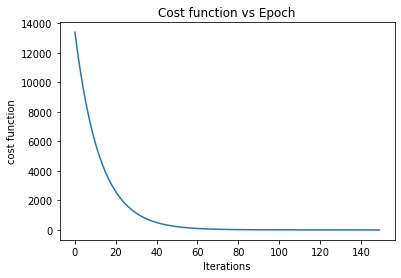

In [ ]:
plt.plot(costs_MLR)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");


## Scatter plot of theta0 vs Cost ##

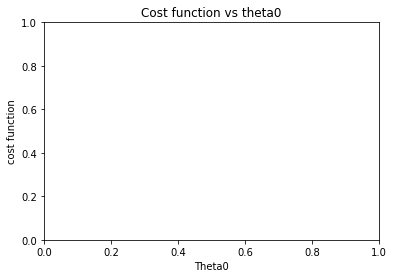

In [ ]:
#plt.plot(thetas_MLR[:,0],costs_MLR)
plt.xlabel("Theta0")
plt.ylabel("cost function")
plt.title("Cost function vs theta0");